# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jgc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jgc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jgc/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import re
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, make_scorer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

In [3]:
# load data from database
database_filename = 'DisasterResponse.db'
engine = create_engine('sqlite:///db/'+database_filename)
df = pd.read_sql_table("messages", engine)
X = df.message.values
Y = df.iloc[:, 4:].values
column_names = df.iloc[:, 4:].columns
Y[:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],


In [34]:
df.message

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
                               ...                        
26211    The training demonstrated how to enhance micro...
26212    A suitable candidate has been selected and OCH...
26213    Proshika, operating in Cox's Bazar municipalit...
26214    Some 2,000 women protesting against the conduc...
26215    A radical shift in thinking came about as a re...
Name: message, Length: 26216, dtype: object

In [29]:
df.drop(labels=['related'], axis=1)

,id,message,original,genre,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,30261,The training demonstrated how to enhance micro...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,30262,A suitable candidate has been selected and OCH...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,30264,"Some 2,000 women protesting against the conduc...",None,news,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

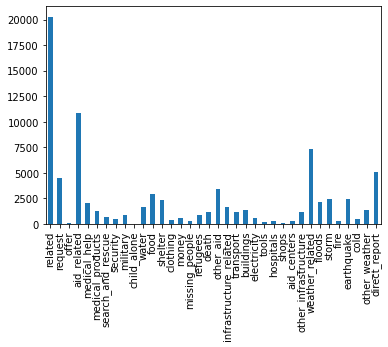

In [24]:
df.iloc[:, 4:].sum(axis=0).plot.bar()

In [32]:
df.iloc[:, 4:].sum(axis=0).index

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [4]:
X[:20]

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name',
       'UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.',
       'says: west side of Haiti, rest of the country today and tonight',
       'Information about the National Palace-',
       'Storm at sacred heart of jesus',
       'Please, we need tents and water. We are in Silo, Thank you!',
       'I would like to receive the messages, thank you',
       'I am in Croix-des-Bouquets. We have health issues. They ( workers ) are in Santo 15. ( an area in Croix-des-Bouquets )',
       "There's nothing to eat and water, we starving and thirsty.",
       'I am in Petionville. I need more information regarding 4636',
       'I am in Thomassin number 32, in the area named Pyron. I would like to have some water. Thank God we are fine, but we desperately need water. Thanks',
  

### 2. Write a tokenization function to process your text data

In [5]:
def tokenize(text):
    
    #replacing the url by urlplaceholder
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")
    
    #Remove punctuation and convert to lower case
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text).lower()
    
    #split the text in a list of words, called tokens
    tokens = nltk.word_tokenize(text)
    
    #
    lemmatizer = nltk.WordNetLemmatizer()

    clean_tokens = []
    
    clean_tokens = [lemmatizer.lemmatize(token).lower().strip() for token in tokens]

    return clean_tokens

In [6]:
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return True
        return False

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [7]:
pipeline_ada = Pipeline([
                ('count_vectorizer', CountVectorizer(tokenizer=tokenize)),
                ('tfidf_transformer', TfidfTransformer()),
                ('classifier', MultiOutputClassifier(AdaBoostClassifier()))
    ])

In [8]:
pipeline_rfc = Pipeline([
                ('count_vectorizer', CountVectorizer(tokenizer=tokenize)),
                ('tfidf_transformer', TfidfTransformer()),
                ('classifier', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1)))
    ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [135]:
pipeline_fitted = pipeline_ada.fit(X_train, y_train)

In [136]:
pipeline_fitted_rfc = pipeline_rfc.fit(X_train, y_train)

C:\Users\jordi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jordi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jordi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jordi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jordi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [156]:
def get_scores(y_test, y_pred):
    scores = pd.DataFrame()
    for indx in range(y_test.shape[-1]):
        
        accuracy = accuracy_score(y_test[:, indx], y_pred[:, indx])
        precision =round( precision_score(y_test[:, indx], y_pred[:, indx], average='micro'))
        recall = recall_score(y_test[:, indx], y_pred[:, indx], average='micro')
        f_1 = f1_score(y_test[:, indx], y_pred[:, indx], average='micro')
        
        score = {
        'Category':column_names[indx],
        'Accuracy': accuracy, 
        'Precision': precision, 
        'Recall': recall, 
        'F1 Score': f_1}
        
        scores = scores.append(score, ignore_index=True)
    scores = scores.set_index('Category')
    return scores

In [138]:
y_pred = pipeline_fitted.predict(X_test)

In [157]:
get_scores(y_test, y_pred)

,Accuracy,F1 Score,Precision,Recall
Category,,,,
related,0.862984,0.862984,1.0,0.862984
request,0.862984,0.862984,1.0,0.862984
offer,0.862984,0.862984,1.0,0.862984
aid_related,0.862984,0.862984,1.0,0.862984
medical_help,0.862984,0.862984,1.0,0.862984
medical_products,0.862984,0.862984,1.0,0.862984
search_and_rescue,0.862984,0.862984,1.0,0.862984
security,0.862984,0.862984,1.0,0.862984
military,0.862984,0.862984,1.0,0.862984


In [158]:
score_ada = get_scores(y_test, y_pred).mean()
score_ada

Accuracy     0.862984
F1 Score     0.862984
Precision    1.000000
Recall       0.862984
dtype: float64

In [159]:
y_pred = pipeline_fitted_rfc.predict(X_test)
get_scores(y_test, y_pred)

,Accuracy,F1 Score,Precision,Recall
Category,,,,
related,0.843912,0.843912,1.0,0.843912
request,0.843912,0.843912,1.0,0.843912
offer,0.843912,0.843912,1.0,0.843912
aid_related,0.843912,0.843912,1.0,0.843912
medical_help,0.843912,0.843912,1.0,0.843912
medical_products,0.843912,0.843912,1.0,0.843912
search_and_rescue,0.843912,0.843912,1.0,0.843912
security,0.843912,0.843912,1.0,0.843912
military,0.843912,0.843912,1.0,0.843912


In [160]:
score_rfc = get_scores(y_test, y_pred).mean()
score_rfc

Accuracy     0.843912
F1 Score     0.843912
Precision    1.000000
Recall       0.843912
dtype: float64

In [54]:
for i in range(len(Y.columns)):
    print('Category: ', Y.columns[i])
    print(classification_report(y_test.iloc[:, i].values, y_pred[:, i]))
    print('Accuracy: ', accuracy_score(y_test.iloc[:, i].values, y_pred[:, i]))

Category:  related
              precision    recall  f1-score   support

           0       0.53      0.22      0.31      1497
           1       0.80      0.94      0.86      5000
           2       0.42      0.18      0.25        57

   micro avg       0.77      0.77      0.77      6554
   macro avg       0.58      0.45      0.47      6554
weighted avg       0.73      0.77      0.73      6554

Accuracy:  0.7694537686908758
Category:  request
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5427
           1       0.78      0.54      0.64      1127

   micro avg       0.89      0.89      0.89      6554
   macro avg       0.84      0.75      0.79      6554
weighted avg       0.89      0.89      0.89      6554

Accuracy:  0.8944156240463839
Category:  offer
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6529
           1       0.00      0.00      0.00        25

   micro avg 

### 6. Improve your model
Use grid search to find better parameters. 

In [151]:
def get_accuracy_score(y_test, y_pred):
    
    scores = []
    
    for indx in range(y_test.shape[-1]):
        scores.append( accuracy_score(y_test[:, i], y_pred[:, i]))
        
    return np.mean(scores)

accuracy_scorer = make_scorer(get_accuracy_score)

In [116]:
pipeline_ada.get_params()

{'memory': None,
 'steps': [('count_vectorizer',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x000002AFC671A488>,
           vocabulary=None)),
  ('tfidf_transformer',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('classifier',
   MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
             learning_rate=1.0, n_estimators=50, random_state=None),
              n_jobs=None))],
 'count_vectorizer': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True,

In [164]:
parameters_grid = {'classifier__estimator__learning_rate': [0.01, 0.02, 0.05],
              'classifier__estimator__n_estimators': [10, 20, 40]}

# create grid search object
clf_ada = GridSearchCV(
    pipeline_ada, 
    param_grid=parameters_grid, 
    scoring=accuracy_scorer, 
    n_jobs=-1
    )

clf_ada.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...or=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classifier__estimator__learning_rate': [0.01, 0.02, 0.05], 'classifier__estimator__n_estimators': [10, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(get_accuracy_score), verbose=0)

In [168]:
clf_ada.best_score_

0.8404536669718238

In [171]:
clf_ada.best_params_

{'classifier__estimator__learning_rate': 0.05,
 'classifier__estimator__n_estimators': 40}

In [166]:
pipeline_rfc.get_params()

{'memory': None,
 'steps': [('count_vectorizer',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words=None,
           strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x000002AFD0414488>,
           vocabulary=None)),
  ('tfidf_transformer',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('classifier',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,

In [167]:
parameters = {
    'classifier__estimator__max_depth': [15, 25, 50, 75],  
    'classifier__estimator__n_estimators': [50, 100, 250, 300]    
}

# create grid search object
clf_rfc = GridSearchCV(
    pipeline_rfc, 
    param_grid=parameters, 
    scoring=accuracy_scorer, 
    verbose=10, 
    return_train_score=True,
    n_jobs=-1
    )

clf_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed: 22.4min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed: 28.3min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 30.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 30.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ..._score=False, random_state=None, verbose=0,
            warm_start=False),
           n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'classifier__estimator__max_depth': [15, 25, 50, 75], 'classifier__estimator__n_estimators': [50, 100, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(get_accuracy_score), verbose=10)

In [169]:
clf_rfc.best_score_

0.8593734106398129

In [170]:
clf_rfc.best_params_

{'classifier__estimator__max_depth': 75,
 'classifier__estimator__n_estimators': 250}

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
y_pred = clf_rfc.predict(X_test)

In [ ]:
get_scores(y_test, y_pred)

In [ ]:
score_rfc = get_scores(y_test, y_pred).mean()
score_rfc

In [ ]:
y_pred = clf_ada.predict(X_test)
get_scores(y_test, y_pred)

In [ ]:
score_ada = get_scores(y_test, y_pred).mean()
score_ada

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.